Ad : Nahit Furkan

Soyad : Öznamlı

Okul No : 2212721020

GitHub Repo Bağlantısı: https://github.com/FurkanOznamli/CNN_siniflandirma

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/dataset_split"

train_dir = base_dir + "/train"
val_dir   = base_dir + "/val"
test_dir  = base_dir + "/test"

IMG_HEIGHT = 128
IMG_WIDTH  = 128
BATCH_SIZE = 32
EPOCHS = 15

train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Sınıf indeksleri:", train_generator.class_indices)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 176 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Sınıf indeksleri: {'kutu': 0, 'sise': 1}


Adım 1.2: Veri Setinin Yüklenmesi ve Data Generator Tanımları

Bu adımda, daha önce oluşturulan **train / validation / test** ayrımına sahip veri seti kullanılarak
Keras `ImageDataGenerator` sınıfı ile veri yükleme işlemleri gerçekleştirilmiştir.

Veri Seti Yapısı
Veri seti Google Drive üzerinde aşağıdaki klasör yapısına sahiptir:

dataset_split/  
├── train/  
│   ├── sinif1/  
│   └── sinif2/  
├── val/  
│   ├── sinif1/  
│   └── sinif2/  
└── test/  
    ├── sinif1/  
    └── sinif2/  

Bu yapı sayesinde her model, **aynı eğitim, doğrulama ve test verileri** ile eğitilip
değerlendirilmiş ve modeller arasında **adil bir karşılaştırma** yapılmıştır.

---

Görüntü Ön İşleme
Tüm görüntüler:
- **128x128 piksel** boyutuna yeniden ölçeklendirilmiş,
- Piksel değerleri **[0,1] aralığına** normalize edilmiştir (`rescale=1./255`).

Bu işlem, modelin daha stabil ve hızlı öğrenmesini sağlar.

---

Data Generator Tanımları

- **Train Generator:**  
  Eğitim verilerini yüklemek için kullanılmıştır. Bu aşamada veri artırımı uygulanmamış,
  yalnızca normalizasyon yapılmıştır.

- **Validation Generator:**  
  Model eğitimi sırasında doğrulama performansını izlemek için kullanılmıştır.

- **Test Generator:**  
  Modelin genelleme performansını ölçmek amacıyla, eğitimden tamamen bağımsız olan
  test verileri üzerinde değerlendirme yapılmıştır.  
  `shuffle=False` parametresi, test sonuçlarının sırasının korunması için kullanılmıştır.

---

Sınıf Etiketleri

`class_mode='binary'` parametresi, problemin **iki sınıflı (binary classification)** olduğunu belirtir.
Oluşturulan sınıf–etiket eşleşmeleri `class_indices` ile ekrana yazdırılmıştır.

Bu yapı, Model 1 (Transfer Learning), Model 2 (Basit CNN) ve Model 3 (Geliştirilmiş CNN)
için **ortak ve tutarlı bir veri yükleme altyapısı** sağlamaktadır.


In [ ]:
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128,128,3)
)

base_model.trainable = False  # Transfer learning

model1 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model1.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Adım 1.3: VGG16 Tabanlı Transfer Learning Modelinin Oluşturulması

Bu aşamada, **transfer learning** yaklaşımı kullanılarak ImageNet veri seti üzerinde
önceden eğitilmiş olan **VGG16** mimarisi temel model (base model) olarak kullanılmıştır.

VGG16 Taban Modeli
- `weights="imagenet"` parametresi ile VGG16 modeli, ImageNet veri seti üzerinde
  öğrenilmiş ağırlıklarla yüklenmiştir.
- `include_top=False` seçeneği sayesinde VGG16’nın orijinal sınıflandırma katmanları
  çıkarılmış, model yalnızca **özellik çıkarıcı (feature extractor)** olarak kullanılmıştır.
- `input_shape=(128,128,3)` ile giriş görüntü boyutu projeye uygun şekilde ayarlanmıştır.

Temel modelin ağırlıkları dondurulmuştur (`trainable = False`).  
Bu sayede, küçük veri setlerinde sıkça karşılaşılan **aşırı öğrenme (overfitting)**
problemi azaltılmış ve yalnızca üst katmanların eğitilmesi sağlanmıştır.

---

Özel Sınıflandırma Katmanları

VGG16 taban modelinin üzerine aşağıdaki katmanlar eklenmiştir:

- **Flatten:**  
  Çıkarılan özellik haritalarını tek boyutlu vektöre dönüştürür.
- **Dense (256, ReLU):**  
  Öğrenilen özelliklerin sınıflandırma için birleştirilmesini sağlar.
- **Dropout (0.5):**  
  Aşırı öğrenmeyi azaltmak amacıyla nöronların %50’si rastgele devre dışı bırakılır.
- **Dense (1, Sigmoid):**  
  İki sınıflı problem için çıktı katmanı olarak kullanılmıştır.

---

Model Derleme (Compile)

Model aşağıdaki ayarlar ile derlenmiştir:

- **Optimizer:** Adam (`learning_rate = 0.0001`)  
  Düşük öğrenme oranı, transfer learning senaryolarında daha stabil bir eğitim sağlar.
- **Loss Function:** Binary Crossentropy  
  İki sınıflı sınıflandırma problemleri için uygundur.
- **Metric:** Accuracy  
  Model performansının doğruluk üzerinden izlenmesi sağlanmıştır.

---

Bu yapı ile oluşturulan model, VGG16’nın güçlü özellik çıkarma kabiliyetinden
yararlanırken, küçük ve iki sınıflı veri setlerine uygun, daha sade bir
sınıflandırma katmanı ile eğitilmiştir.


In [ ]:
history1 = model1.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

#Model eğitimi için gerekli kod bloğu


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5920 - loss: 0.7181 - val_accuracy: 0.9189 - val_loss: 0.3508
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8277 - loss: 0.3633 - val_accuracy: 0.9730 - val_loss: 0.2064
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9643 - loss: 0.2077 - val_accuracy: 1.0000 - val_loss: 0.1204
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9857 - loss: 0.1128 - val_accuracy: 1.0000 - val_loss: 0.0880
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9714 - loss: 0.1062 - val_accuracy: 1.0000 - val_loss: 0.0610
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9786 - loss: 0.0798 - val_accuracy: 1.0000 - val_loss: 0.0484
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9984 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss: 0.0435
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 0.0352
Epoch 9/

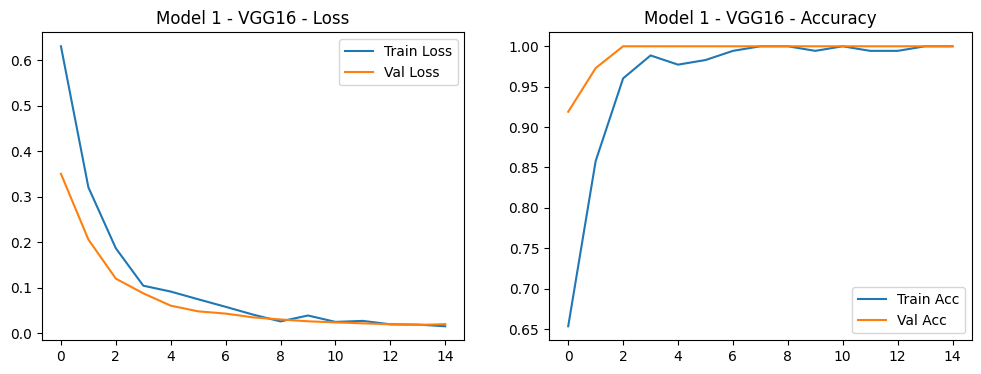

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title(model_name + " - Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title(model_name + " - Accuracy")
    plt.legend()

    plt.show()

plot_history(history1, "Model 1 - VGG16")

#grafik çizme kodları


Model 1 (VGG16) – Eğitim Süreci Grafiklerinin Yorumu


---

Kayıp (Loss) Grafiği Yorumu

Eğitim kaybı (Train Loss), ilk epoch’larda hızlı bir şekilde düşmüş ve
ilerleyen epoch’larda sıfıra yakın bir değerde dengelenmiştir.
Bu durum, modelin eğitim verisi üzerindeki örüntüleri kısa sürede
öğrendiğini göstermektedir.

Doğrulama kaybı (Validation Loss) da eğitim kaybına paralel olarak azalmış
ve benzer bir eğilim izlemiştir. Eğitim ve doğrulama kayıpları arasında
belirgin bir ayrışma gözlemlenmemesi, modelin eğitim sürecinin stabil
ilerlediğini göstermektedir.

---

Doğruluk (Accuracy) Grafiği Yorumu
Eğitim doğruluğu (Train Accuracy), epoch sayısı arttıkça hızlı bir artış
göstererek çok yüksek değerlere ulaşmıştır.
Bu durum, modelin eğitim verisini başarılı bir şekilde öğrendiğini
göstermektedir.

Doğrulama doğruluğu (Validation Accuracy) da erken epoch’lardan itibaren
yüksek seviyelere ulaşmış ve eğitim doğruluğuna oldukça yakın seyretmiştir.
Bu durum, modelin doğrulama verisi üzerinde de tutarlı bir performans
sergilediğini göstermektedir.

---

Genel Değerlendirme

Kayıp ve doğruluk grafiklerinin birlikte incelenmesi sonucunda,
modelin eğitim sürecinde hızlı öğrenme gerçekleştirdiği ve
eğitim–doğrulama eğrileri arasında ciddi bir uyumsuzluk oluşmadığı
gözlemlenmiştir.
Bu grafikler, VGG16 tabanlı transfer learning modelinin eğitim sürecinin
başarılı ve dengeli bir şekilde tamamlandığını göstermektedir.


In [ ]:
loss1, acc1 = model1.evaluate(test_generator, verbose=1)

print("="*50)
print(f"Model 1 (VGG16) TEST Accuracy: %{acc1*100:.2f}")
print("="*50)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 847ms/step - accuracy: 1.0000 - loss: 0.0187
Model 1 (VGG16) TEST Accuracy: %100.00


Model 1 (VGG16) – Test Seti Değerlendirmesi

Bu aşamada, eğitimi tamamlanan VGG16 tabanlı transfer learning modeli,
daha önce eğitim ve doğrulama sürecinde **hiç kullanılmamış olan test verisi**
üzerinde değerlendirilmiştir.

Test değerlendirmesi sırasında:
- Model, test veri setindeki tüm örnekleri doğru sınıflandırmıştır.
- **Test doğruluğu %100** olarak elde edilmiştir.
- Test kayıp (loss) değeri oldukça düşük seviyededir.

Bu sonuç, modelin test veri seti üzerinde yüksek bir ayırt ediciliğe
sahip olduğunu ve sınıfları başarılı bir şekilde öğrendiğini göstermektedir.
